In [ ]:
pip install praw matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
import praw

# Your credentials (replace with your actual values or load from environment variables)
client_id = ''
client_secret = ''
user_agent = 'MyRedditApp/1.0 by yourusername'

# Create a Reddit instance
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

# Choose a subreddit and collect post data
subreddit = reddit.subreddit("python")

# Store data in a list of dictionaries
posts_data = []
for post in subreddit.hot(limit=10):
    posts_data.append({
        'Title': post.title,
        'Upvotes': post.score,
        'Comments': post.num_comments,
        'Author': str(post.author)
    })


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [ ]:
import pandas as pd

df = pd.DataFrame(posts_data)
print(df.head())  # View the data before visualization


                                               Title  Upvotes  Comments  \
0  Sunday Daily Thread: What's everyone working o...        1         0   
1         Wednesday Daily Thread: Beginner questions        2         2   
2  Advanced Alchemy 1.0 - A framework agnostic li...       38         1   
3  CPython's optimization for doubly linked lists...      108         7   
4  Declarative GUI toolkit - Slint 1.11 upgrades ...       11         0   

          Author  
0  AutoModerator  
1  AutoModerator  
2         cofin_  
3           _byl  
4       slint-ui  


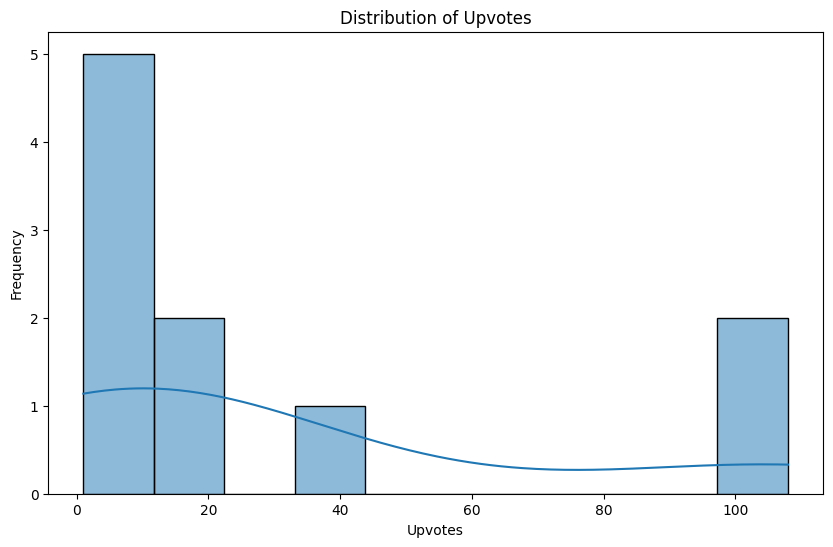

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Upvotes distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Upvotes'], bins=10, kde=True)
plt.title('Distribution of Upvotes')
plt.xlabel('Upvotes')
plt.ylabel('Frequency')
plt.show()


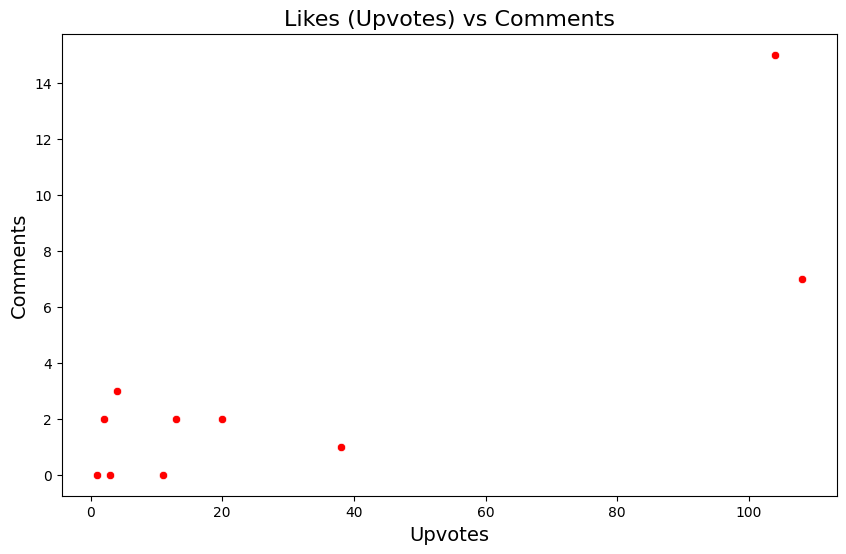

In [ ]:
# Assuming 'Upvotes' and 'Comments' columns exist in your DataFrame
comments_data = df['Comments']  # Assuming you've added a 'Comments' column
upvotes_data = df['Upvotes']
plt.figure(figsize=(10, 6))
sns.scatterplot(x=upvotes_data, y=comments_data, color='red')
plt.title('Likes (Upvotes) vs Comments', fontsize=16)
plt.xlabel('Upvotes', fontsize=14)
plt.ylabel('Comments', fontsize=14)
plt.show()


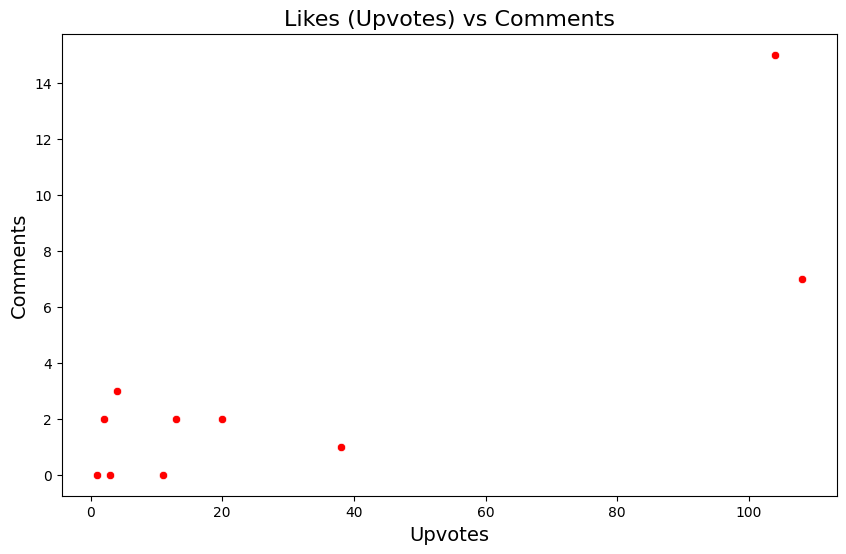

In [ ]:
# Assuming 'Upvotes' and 'Comments' columns exist in your DataFrame
comments_data = df['Comments']  # Assuming you've added a 'Comments' column

plt.figure(figsize=(10, 6))
sns.scatterplot(x=upvotes_data, y=comments_data, color='red')
plt.title('Likes (Upvotes) vs Comments', fontsize=16)
plt.xlabel('Upvotes', fontsize=14)
plt.ylabel('Comments', fontsize=14)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


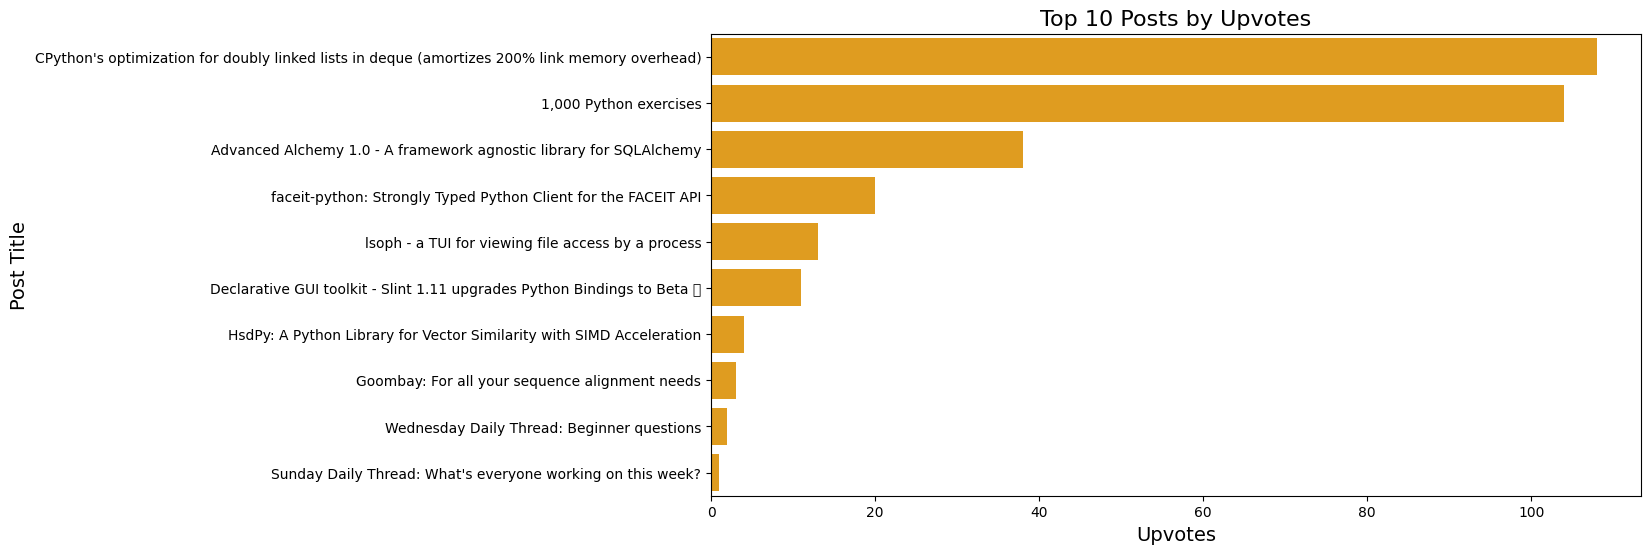

In [ ]:
# Sorting by upvotes
top_posts = df[['Title', 'Upvotes']].sort_values(by='Upvotes', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Upvotes', y='Title', data=top_posts, color='orange')
plt.title('Top 10 Posts by Upvotes', fontsize=16)
plt.xlabel('Upvotes', fontsize=14)
plt.ylabel('Post Title', fontsize=14)
plt.show()


In [ ]:
df.value_counts()

,,,,,count
Title,Upvotes,Comments,Author,Engagement_Rate,
"1,000 Python exercises",104,15,Overall_Ad_7178,119.0,1
Advanced Alchemy 1.0 - A framework agnostic library for SQLAlchemy,38,1,cofin_,39.0,1
CPython's optimization for doubly linked lists in deque (amortizes 200% link memory overhead),108,7,_byl,115.0,1
Declarative GUI toolkit - Slint 1.11 upgrades Python Bindings to Beta 🚀,11,0,slint-ui,11.0,1
Goombay: For all your sequence alignment needs,3,0,Kind-Kure,3.0,1
HsdPy: A Python Library for Vector Similarity with SIMD Acceleration,4,3,No_Pomegranate7508,7.0,1
Sunday Daily Thread: What's everyone working on this week?,1,0,AutoModerator,1.0,1
Wednesday Daily Thread: Beginner questions,2,2,AutoModerator,4.0,1
faceit-python: Strongly Typed Python Client for the FACEIT API,20,2,GiraffeLarge9085,22.0,1


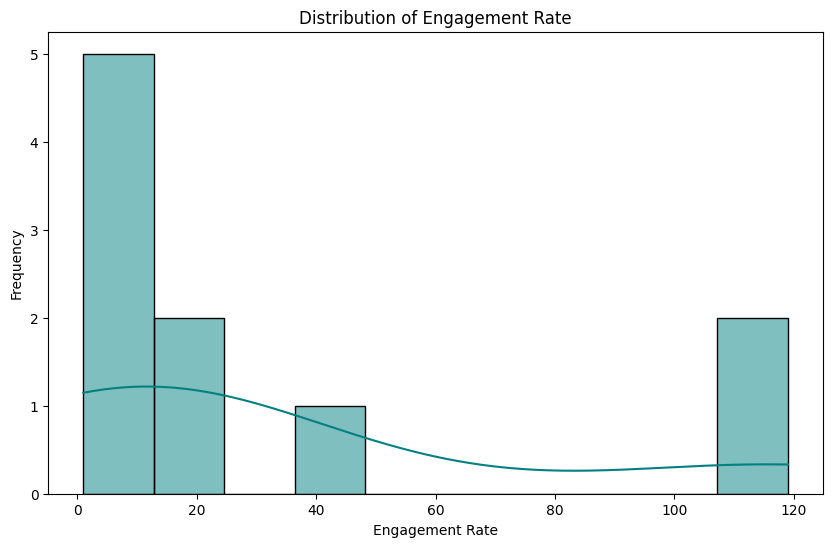

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Engagement_Rate'], bins=10, kde=True, color='teal')
plt.xlabel("Engagement Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Engagement Rate")
plt.show()


<ipython-input-18-e83076ba7b79>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Engagement_Rate', y='Title', data=df_sorted, palette='mako')
<ipython-input-18-e83076ba7b79>:9: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


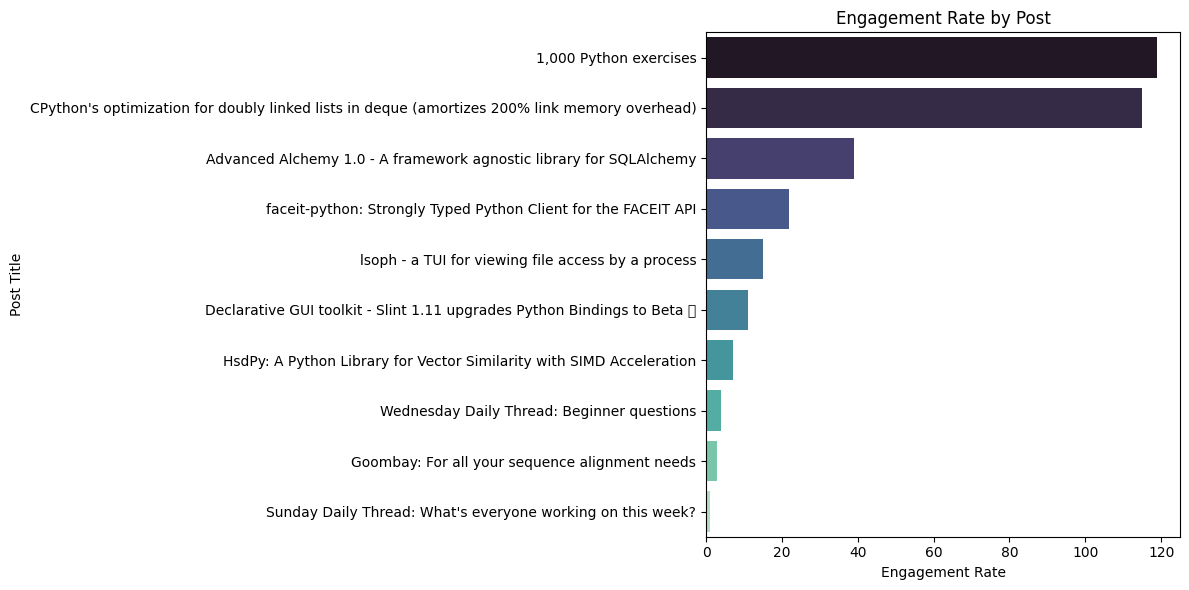

In [ ]:
# Sort the DataFrame by engagement_rate
df_sorted = df.sort_values('Engagement_Rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Engagement_Rate', y='Title', data=df_sorted, palette='mako')
plt.xlabel("Engagement Rate")
plt.ylabel("Post Title")
plt.title("Engagement Rate by Post")
plt.tight_layout()
plt.show()
